<a href="https://colab.research.google.com/github/riski86-oss/TugasAkhir/blob/main/Test_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns
import sklearn
import imblearn
import warnings
import sys

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold = sys.maxsize)
np.set_printoptions(precision = 3)
sns.set(style = "darkgrid")
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v, round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))

def analyze(filename):
    print()
    print("Analyzing: {}".format(filename))
    df = pd.read_csv(filename, encoding = 'utf-8')
    cols = df.columns.values
    total = float(len(df))
    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col, unique_count ,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col, expand_categories(df[col])))
            expand_categories(df[col])

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
datatrain = '/content/gdrive/My Drive/DataSet/ddoscicids2017.csv'
datatest = '/content/gdrive/My Drive/DataSet/dosmanualfix.csv'
#analyze(datatest)

In [4]:
col_names = [
    'flow_id','source_ip','source_port','destination_ip','destination_port','protocol','timestamp','flow_duration',
    'total_fwd_packets','total_bwd_packets','total_length_of_fwd_packets','total_length_of_bwd_packets',
    'fwd_packet_length_max','fwd_packet_length_min','fwd_packet_length_mean','fwd_packet_length_std',
    'bwd_packet_length_max','bwd_packet_length_min','bwd_packet_length_mean','bwd_packet_length_std',
    'flow_bytes','flow_packets','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min',
    'fwd_iat_total','fwd_iat_mean','fwd_iat_std','fwd_iat_max','fwd_iat_min','bwd_iat_total','bwd_iat_mean',
    'bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags','bwd_urg_flags',
    'fwd_header_length','bwd_header_length','fwd_packets','bwd_packets','min_packet_length','max_packet_length',
    'packet_length_mean','packet_length_std','packet_length_variance','fin_flag_count','syn_flag_count',
    'rst_flag_count','psh_flag_count','ack_flag_count','urg_flag_count','cwe_flag_count','ece_flag_count',
    'down_up_ratio','average_packet_size','avg_fwd_segment_size','avg_bwd_segment_size','fwd_avg_bytes_bulk',
    'fwd_avg_packets_bulk','fwd_avg_bulk_rate','bwd_avg_bytes_bulk','bwd_avg_packets_bulk','bwd_avg_bulk_rate',
    'subflow_fwd_packets','subflow_fwd_bytes','subflow_bwd_packets','subflow_bwd_bytes','init_win_bytes_forward',
    'init_win_bytes_backward','act_data_pkt_fwd','min_seg_size_forward','active_mean','active_std','active_max',
    'active_min','idle_mean','idle_std','idle_max','idle_min','label'
]

df_train = pd.read_csv(datatrain, names = col_names, skiprows = 1)
df_test = pd.read_csv(datatest, names = col_names, skiprows = 1)

print('Dimensi Data Latih:', df_train.shape)
print('Dimensi Data Uji:', df_test.shape)

Dimensi Data Latih: (225745, 84)
Dimensi Data Uji: (7760, 84)


In [5]:
df_train.head()

,flow_id,source_ip,source_port,destination_ip,destination_port,protocol,timestamp,flow_duration,total_fwd_packets,total_bwd_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes,flow_packets,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets,bwd_packets,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down_up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,fwd_avg_bytes_bulk,fwd_avg_packets_bulk,fwd_avg_bulk_rate,bwd_avg_bytes_bulk,bwd_avg_packets_bulk,bwd_avg_bulk_rate,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
df_test.head()

,flow_id,source_ip,source_port,destination_ip,destination_port,protocol,timestamp,flow_duration,total_fwd_packets,total_bwd_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes,flow_packets,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets,bwd_packets,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down_up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,fwd_avg_bytes_bulk,fwd_avg_packets_bulk,fwd_avg_bulk_rate,bwd_avg_bytes_bulk,bwd_avg_packets_bulk,bwd_avg_bulk_rate,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,192.168.56.4-192.168.56.7-18741-0-17,192.168.56.4,18741,192.168.56.7,0,17,28/05/2022 12:52:48 AM,7536141,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.530776,2512047.00,5.432468e+05,2948624.0,1903672.0,5632469.0,2.816234e+06,1.872270e+05,2948624.0,2683845.0,0.0,0.0,0.0,0.0,0,0,0,0,0,24,8,0.398082,0.132694,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,1,0,-1,-1,0,0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,DDoS
1,192.168.56.4-192.168.56.7-0-49454-6,192.168.56.4,0,192.168.56.7,49454,6,28/05/2022 12:53:21 AM,11511913,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.434333,2877978.25,1.001154e+06,4295706.0,1942966.0,7216207.0,2.405402e+06,4.043477e+05,2692402.0,1942966.0,0.0,0.0,0.0,0.0,0,0,0,0,0,80,20,0.347466,0.086867,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,4,0,1,0,-1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,DDoS
2,192.168.56.4-192.168.56.7-0-4113-6,192.168.56.4,0,192.168.56.7,4113,6,28/05/2022 12:53:19 AM,12248744,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.244923,6124372.00,1.198926e+06,6972141.0,5276603.0,5276603.0,5.276603e+06,0.000000e+00,5276603.0,5276603.0,0.0,0.0,0.0,0.0,0,0,0,0,0,40,20,0.163282,0.081641,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,1,0,-1,0,0,0,0.0,0.0,0.0,0.0,6124372.0,1.198926e+06,6972141.0,5276603.0,DDoS
3,192.168.56.4-192.168.56.7-0-16541-6,192.168.56.4,0,192.168.56.7,16541,6,28/05/2022 12:53:20 AM,6625878,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.301847,6625878.00,0.000000e+00,6625878.0,6625878.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,20,20,0.150923,0.150923,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,1,0,-1,0,0,0,0.0,0.0,0.0,0.0,6625878.0,0.000000e+00,6625878.0,6625878.0,DDoS
4,192.168.56.4-192.168.56.7-0-47297-6,192.168.56.4,0,192.168.56.7,47297,6,28/05/2022 12:53:21 AM,11579025,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.431815,2894756.25,1.138362e+06,4507136.0,1848858.0,9096897.0,3.032299e+06,1.352884e+06,4507136.0,1848858.0,0.0,0.0,0.0,0.0,0,0,0,0,0,80,20,0.345452,0.086363,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,4,0,1,0,-1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,DDoS


In [7]:
df_train.describe()

,source_port,destination_port,protocol,flow_duration,total_fwd_packets,total_bwd_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes,flow_packets,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets,bwd_packets,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down_up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,fwd_avg_bytes_bulk,fwd_avg_packets_bulk,fwd_avg_bulk_rate,bwd_avg_bytes_bulk,bwd_avg_packets_bulk,bwd_avg_bulk_rate,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
count,225745.000000,225745.00000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,2.257410e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,225745.000000,225745.0,225745.0,225745.0,225745.000000,225745.000000,2.257450e+05,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.0,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.0,225745.0,225745.0,225745.0,225745.0,225745.0,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,38257.568402,8879.61946,7.600288,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,2735.585147,16.718776,890.536849,1230.172938,inf,inf,1.580587e+06,4.248569e+06,1.348977e+07,2.811855e+04,1.539652e+07,2.540610e+06,5.195207e+06,1.299434e+07,2.073698e+05,6.564701e+06,9.476322e+05,1.610306e+06,4.567514e+06,2.257817e+05,0.033223,0.0,0.0,0.0,111.522718,106.789023,1.261508e+04,1.641693e+03,8.072595,3226.045339,515.002137,1085.593207,2.789906e+06,0.002671,0.033223,0.000120,0.351162,0.504463,0.140752,0.0,0.000120,1.005821,574.568843,164.826715,890.536849,0.0,0.0,0.0,0.0,0.0,0.0,4.874916,939.463346,4.572775,5.960477e+03,4247.436922,601.048635,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,23057.302075,19754.64740,3.881586,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,3705.123460,50.480568,1120.324921,1733.201267,NaN,NaN,2.701596e+06,7.622819e+06,2.670172e+07,7.598100e+05,3.160826e+07,5.934694e+06,1.078635e+07,2.748870e+07,3.795228e+06,2.198455e+07,4.586374e+06,5.475778e+06,1.617865e+07,4.019290e+06,0.179220,0.0,0.0,0.0,375.790727,511.765795,1.106701e+05,1.989593e+04,15.767713,3813.134850,559.064495,1269.558714,4.115941e+06,0.051614,0.179220,0.010936,0.477334,0.499981,0.347766,0.0,0.010936,1.430781,626.096202,504.892965,1120.324921,0.0,0.0,0.0,0.0,0.0,0.0,15.422874,3249.403484,21.755356,3.921834e+04,8037.781019,4319.720339,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07
min,0.000000,0.00000,0.00000

In [8]:
df_test.describe()

,source_port,destination_port,protocol,flow_duration,total_fwd_packets,total_bwd_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes,flow_packets,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets,bwd_packets,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down_up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,fwd_avg_bytes_bulk,fwd_avg_packets_bulk,fwd_avg_bulk_rate,bwd_avg_bytes_bulk,bwd_avg_packets_bulk,bwd_avg_bulk_rate,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
count,7760.000000,7760.000000,7760.000000,7.760000e+03,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7.760000e+03,7.760000e+03,7.760000e+03,7.760000e+03,7.760000e+03,7.760000e+03,7.760000e+03,7.760000e+03,7.760000e+03,7.760000e+03,7.760000e+03,7.760000e+03,7.760000e+03,7760.000000,7760.0,7760.000000,7760.0,7760.0,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.0,7760.0,7760.0,7760.000000,7760.000000,7760.000000,7760.000000,7760.0,7760.0,7760.0,7760.0,7760.0,7760.0,7760.000000,7760.000000,7760.000000,7760.000000,7760.0,7760.000000,7760.000000,7760.0,7.760000e+03,7.760000e+03,7.760000e+03,7.760000e+03,7.760000e+03,7.760000e+03,7.760000e+03,7.760000e+03
mean,24947.377448,16894.069330,9.587887,7.740512e+06,20.691881,1.572680,229.389433,115.614820,3.071134,0.459278,0.910557,0.964092,6.629768,0.459278,3.620006,2.651809,66.342437,3505.004800,2.642049e+06,1.597227e+06,4.172643e+06,1.386620e+06,3.618212e+06,1.700956e+06,3.471355e+05,1.999288e+06,1.423684e+06,2.280811e+06,8.729293e+05,1.028686e+06,1.666709e+06,159.959923,0.0,0.000258,0.0,0.0,179.998969,30.975773,222.072334,3282.932466,0.459278,6.631057,2.471052,2.568377,1496.350162,0.185180,0.125644,0.322294,0.000258,0.598969,0.0,0.0,0.0,0.306959,2.656025,0.910557,3.620006,0.0,0.0,0.0,0.0,0.0,0.0,20.691881,229.389433,1.572680,115.614820,-1.0,517.639948,18.510438,0.0,6.289447e+04,2.685887e+02,6.320460e+04,6.273939e+04,1.467043e+06,7.045864e+04,1.532318e+06,1.410383e+06
std,26434.195263,23185.865226,5.168710,1.027620e+07,515.042048,4.634258,6182.372133,3338.314661,40.602332,12.274711,14.487073,14.574276,92.303381,12.274711,53.342752,39.573487,2438.734266,11492.942227,3.295124e+06,4.461375e+06,7.127626e+06,1.401797e+06,4.439562e+06,2.294742e+06,1.222765e+06,2.914343e+06,1.933749e+06,1.034279e+07,3.798092e+06,4.554036e+06,7.220823e+06,648.637186,0.0,0.016053,0.0,0.0,4120.121644,95.789327,968.151332,11362.535265,12.274711,92.309205,34.697081,38.599814,24381.045388,0.388469,0.331469,0.467385,0.016053,0.490139,0.0,0.0,0.0,0.749002,36.570537,14.487073,53.342752,0.0,0.0,0.0,0.0,0.0,0.0,515.042048,6182.372133,4.634258,3338.314661,0.0,1512.442814,515.112526,0.0,4.389411e+05,2.365601e+04,4.405936e+05,4.387508e+05,4.662771e+06,7.782427e+05,4.913655e+06,4.529106e+06
min,0.000000,0.000000,0.000000,1.300000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034482,1.300000e+01,0.000000e+00,1.300000e+01,7.000000e+00,0.0000

In [9]:
label_freq_train = df_train[['label']].apply(lambda x: x.value_counts())
label_freq_test = df_test[['label']].apply(lambda x: x.value_counts())
label_freq_train['freq_train_percent'] = round((100 * label_freq_train / label_freq_train.sum()), 2)
label_freq_test['freq_test_percent'] = round((100 * label_freq_test / label_freq_test.sum()), 2)

label_dist = pd.concat([label_freq_train,label_freq_test], axis = 1) 
label_dist

,label,freq_train_percent,label,freq_test_percent
DDoS,128027,56.71,4999,64.42
BENIGN,97718,43.29,2761,35.58


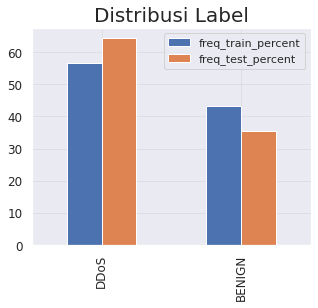

In [10]:
distplot = label_dist[['freq_train_percent','freq_test_percent']].plot(kind = 'bar', figsize = (5,4))
distplot.set_title('Distribusi Label', fontsize = 20)
distplot.grid(color = 'lightgray', alpha = 0.5)

In [11]:
df_train.drop([
    'fwd_urg_flags','bwd_urg_flags','cwe_flag_count','fwd_avg_bytes_bulk','fwd_avg_packets_bulk','fwd_avg_bulk_rate',
    'bwd_avg_bytes_bulk','bwd_avg_packets_bulk','bwd_avg_bulk_rate'], axis=1, inplace=True)
df_test.drop([
    'fwd_urg_flags','bwd_urg_flags','cwe_flag_count','fwd_avg_bytes_bulk','fwd_avg_packets_bulk','fwd_avg_bulk_rate',
    'bwd_avg_bytes_bulk','bwd_avg_packets_bulk','bwd_avg_bulk_rate'], axis=1, inplace=True)

In [12]:
df_train.drop(['flow_id','source_ip','source_port','destination_ip','timestamp'], inplace = True, axis = 1)
df_test.drop(['flow_id','source_ip','source_port','destination_ip','timestamp'], inplace = True, axis = 1)

In [13]:
df_train.isna().any()

destination_port               False
protocol                       False
flow_duration                  False
total_fwd_packets              False
total_bwd_packets              False
total_length_of_fwd_packets    False
total_length_of_bwd_packets    False
fwd_packet_length_max          False
fwd_packet_length_min          False
fwd_packet_length_mean         False
fwd_packet_length_std          False
bwd_packet_length_max          False
bwd_packet_length_min          False
bwd_packet_length_mean         False
bwd_packet_length_std          False
flow_bytes                      True
flow_packets                   False
flow_iat_mean                  False
flow_iat_std                   False
flow_iat_max                   False
flow_iat_min                   False
fwd_iat_total                  False
fwd_iat_mean                   False
fwd_iat_std                    False
fwd_iat_max                    False
fwd_iat_min                    False
bwd_iat_total                  False
b

In [14]:
df_test.isna().any()

destination_port               False
protocol                       False
flow_duration                  False
total_fwd_packets              False
total_bwd_packets              False
total_length_of_fwd_packets    False
total_length_of_bwd_packets    False
fwd_packet_length_max          False
fwd_packet_length_min          False
fwd_packet_length_mean         False
fwd_packet_length_std          False
bwd_packet_length_max          False
bwd_packet_length_min          False
bwd_packet_length_mean         False
bwd_packet_length_std          False
flow_bytes                     False
flow_packets                   False
flow_iat_mean                  False
flow_iat_std                   False
flow_iat_max                   False
flow_iat_min                   False
fwd_iat_total                  False
fwd_iat_mean                   False
fwd_iat_std                    False
fwd_iat_max                    False
fwd_iat_min                    False
bwd_iat_total                  False
b

In [15]:
df_train['flow_bytes'] = df_train['flow_bytes'].astype(np.float64).replace(np.inf, np.nan).fillna(0)
df_train['flow_packets'] = df_train['flow_packets'].astype(np.float64).replace(np.inf, np.nan).fillna(0)

In [16]:
print('Dimensi Data Train:', df_train.shape)
print('Dimensi Data Test:', df_test.shape)

Dimensi Data Train: (225745, 70)
Dimensi Data Test: (7760, 70)


Transformasi Atribut Numerik

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

train_cols = df_train.select_dtypes(include = ['float64','int64']).columns
test_cols = df_test.select_dtypes(include = ['float64','int64']).columns

sctrain = sc.fit_transform(df_train.select_dtypes(include = ['float64','int64']))
sctest = sc.fit_transform(df_test.select_dtypes(include = ['float64','int64']))

sc_dftrain = pd.DataFrame(sctrain, columns = train_cols)
sc_dftest = pd.DataFrame(sctest, columns = test_cols)

In [18]:
sc_dftrain.head()

,destination_port,protocol,flow_duration,total_fwd_packets,total_bwd_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes,flow_packets,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_header_length,bwd_header_length,fwd_packets,bwd_packets,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,ece_flag_count,down_up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
0,2.327831,-0.412278,-0.515210,-0.186406,-0.210191,-0.285426,-0.151982,-0.285676,-0.133981,-0.314576,-0.269507,-0.738327,-0.331193,-0.794893,-0.709771,0.202242,5.668579,-0.585057,-0.55735,-0.505203,-0.037003,-0.487105,-0.428095,-0.481647,-0.472717,-0.054639,-0.298606,-0.20662,-0.294079,-0.282318,-0.056175,-0.185378,0.0,-0.190326,-0.208668,5.909933,-0.082514,-0.131446,-0.844463,-0.910455,-0.855097,-0.677831,-0.051752,-0.185378,-0.010937,-0.735674,0.991113,-0.404732,-0.010937,-0.702989,-0.903328,-0.314576,-0.794893,-0.186406,-0.285426,-0.210191,-0.151982,-0.524330,-0.139372,-0.188386,-0.35585,-0.231634,-0.061512,-0.231146,-0.226482,-0.472345,-0.283137,-0.478364,-0.391071
1,2.337398,-0.412278,-0.515207,-0.251245,-0.164225,-0.287273,-0.151829,-0.285676,-0.133981,-0.314576,-0.269507,-0.736707,-0.212335,-0.789538,-0.709771,-0.028145,0.035706,-0.585018,-0.55735,-0.505200,-0.036864,-0.487106,-0.428095,-0.481647,-0.472717,-0.054640,-0.298606,-0.20662,-0.294079,-0.282318,-0.056175,-0.185378,0.0,-0.243548,-0.169588,-0.031090,0.378602,-0.131446,-0.844463,-0.910455,-0.855097,-0.677831,-0.051752,-0.185378,-0.010937,-0.735674,0.991113,2.470771,-0.010937,-0.004068,-0.903328,-0.314576,-0.789538,-0.251245,-0.287273,-0.164225,-0.151829,-0.524827,-0.079878,-0.269886,-0.35585,-0.231634,-0.061512,-0.231146,-0.226482,-0.472345,-0.283137,-0.478364,-0.391071
2,2.337449,-0.412278,-0.515209,-0.251245,-0.164225,-0.287273,-0.151829,-0.285676,-0.133981,-0.314576,-0.269507,-0.736707,-0.212335,-0.789538,-0.709771,-0.020998,0.210456,-0.585039,-0.55735,-0.505202,-0.036939,-0.487106,-0.428095,-0.481647,-0.472717,-0.054640,-0.298606,-0.20662,-0.294079,-0.282318,-0.056175,-0.185378,0.0,-0.243548,-0.169588,0.059779,0.884056,-0.131446,-0.844463,-0.910455,-0.855097,-0.677831,-0.051752,-0.185378,-0.010937,-0.735674,0.991113,2.470771,-0.010937,-0.004068,-0.903328,-0.314576,-0.789538,-0.251245,-0.287273,-0.164225,-0.151829,-0.524827,-0.079878,-0.269886,-0.35585,-0.231634,-0.061512,-0.231146,-0.226482,-0.472345,-0.283137,-0.478364,-0.391071
3,1.891022,-0.412278,-0.515209,-0.251245,-0.164225,-0.287273,-0.151829,-0.285676,-0.133981,-0.314576,-0.269507,-0.736707,-0.212335,-0.789538,-0.709771,-0.013762,0.387370,-0.585046,-0.55735,-0.505202,-0.036963,-0.487106,-0.428095,-0.481647,-0.472717,-0.054640,-0.298606,-0.20662,-0.294079,-0.282318,-0.056175,-0.185378,0.0,-0.243548,-0.169588,0.151773,1.395769,-0.131446,-0.844463,-0.910455,-0.855097,-0.677831,-0.051752,-0.185378,-0.010937,-0.735674,0.991113,2.470771,-0.010937,-0.004068,-0.903328,-0.314576,-0.789538,-0.251245,-0.287273,-0.164225,-0.151829,-0.524578,-0.062978,-0.269886,-0.35585,-0.231634,-0.061512,-0.231146,-0.226482,-0.472345,-0.283137,-0.478364,-0.391071
4,2.327730,-0.412278,-0.515210,-0.186406,-0.210191,-0.285426,-0.151982,-0.285676,-0.133981,-0.314576,-0.269507,-0.738327,-0.331193,-0.794893,-0.709771,0.202242,5.668579

In [19]:
sc_dftrain[18885:18891]

,destination_port,protocol,flow_duration,total_fwd_packets,total_bwd_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes,flow_packets,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_header_length,bwd_header_length,fwd_packets,bwd_packets,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,ece_flag_count,down_up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
18885,-0.445447,-0.412278,-0.480839,-0.121568,0.065604,-0.281118,0.143824,-0.278166,-0.170717,-0.309294,-0.256636,0.443823,-0.331193,0.930949,0.304418,-0.034030,-0.123643,-0.534924,-0.507798,-0.465123,-0.036953,-0.486695,-0.427002,-0.480890,-0.472271,-0.054451,-0.249325,-0.159375,-0.206937,-0.216169,-0.056164,-0.185378,0.0,-0.105172,0.049263,-0.113963,-0.082236,-0.511971,0.302627,1.158541,0.440822,-0.020186,-0.051752,-0.185378,-0.010937,1.359298,-1.008966,-0.404732,-0.010937,0.694852,1.145705,-0.309294,0.930949,-0.121568,-0.281118,0.065604,0.143824,0.490754,-0.086128,-0.106887,-0.35585,-0.231634,-0.061512,-0.231146,-0.226482,-0.472345,-0.283137,-0.478364,-0.391071
18886,-0.445447,-0.412278,2.023604,0.202627,-0.026328,-0.271885,0.143824,-0.278166,-0.170717,-0.312595,-0.262413,1.625972,-0.331193,1.793870,1.672139,-0.034657,-0.123714,2.108116,2.210661,2.138827,-0.037000,2.002756,1.459116,1.956624,2.095617,-0.054575,-0.236980,-0.108153,-0.152076,-0.198908,-0.056127,-0.185378,0.0,0.160934,-0.028898,-0.113987,-0.082512,-0.511971,1.451291,0.683557,1.105043,0.826729,-0.051752,-0.185378,-0.010937,-0.735674,0.991113,-0.404732,-0.010937,-0.702989,0.634645,-0.312595,1.793870,0.202627,-0.271885,-0.026328,0.143824,-0.496586,-0.086128,0.219112,-0.35585,-0.230457,-0.061512,-0.230103,-0.225284,1.326037,3.181664,2.144104,0.016001
18887,-0.445447,-0.412278,-0.494824,-0.121568,0.065604,-0.281118,0.143977,-0.278166,-0.170717,-0.309294,-0.256636,0.837873,-0.331193,0.931842,0.755105,-0.033594,-0.123594,-0.555323,-0.527594,-0.481172,-0.037003,-0.487080,-0.428028,-0.481597,-0.472688,-0.054635,-0.269381,-0.178602,-0.241687,-0.242655,-0.056174,-0.185378,0.0,-0.105172,0.049263,-0.113946,-0.082045,-0.511971,0.685515,1.159615,0.829216,0.433084,-0.051752,-0.185378,-0.010937,1.359298,-1.008966,-0.404732,-0.010937,0.694852,1.146770,-0.309294,0.931842,-0.121568,-0.281118,0.065604,0.143977,0.490754,-0.086128,-0.106887,-0.35585,-0.231634,-0.061512,-0.231146,-0.226482,-0.472345,-0.283137,-0.478364,-0.391071
18888,-0.445447,-0.412278,2.014004,0.202627,0.019638,-0.271885,0.143824,-0.278166,-0.170717,-0.312595,-0.262413,0.837873,-0.331193,1.276118,0.696205,-0.034657,-0.123714,1.874349,2.105713,2.138827,-0.036950,1.993264,1.459116,1.965895,2.095617,-0.054592,-0.236878,-0.132647,-0.170683,-0.198702,-0.056140,-0.185378,0.0,0.160934,0.010182,-0.113987,-0.082511,-0.511971,0.685515,0.568933,0.542956,0.087559,-0.051752,-0.185378,-0.010937,-0.735674,0.991113,-0.404732,-0.010937,-0.702989,0.515233,-0.312595,1.276118,0.202627,-0.271885,0.019638,0.143824,-0.496586,-0.086128,0.219112,-0.35585,-0.230492,-0.061512,-0.230134,-0.225320,1.321461,3.197342,2.144104,0.000562
18889,-0.445447,-0.412278,-0.505499,-0.121568,0.065604,-0.281118,0.143977,-0.278166,-0.170717,-0.309294,-0.256636,0.837873,-0.331193,0.931842,0.755105,-0.032415,-0.123460,-0.570893,-0.543192,-0.493767,-0.037003,-0.

In [20]:
sc_dftrain.tail()

,destination_port,protocol,flow_duration,total_fwd_packets,total_bwd_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes,flow_packets,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_header_length,bwd_header_length,fwd_packets,bwd_packets,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,ece_flag_count,down_up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
225740,2.657324,-0.412278,-0.515208,-0.251245,-0.164225,-0.287273,-0.151829,-0.285676,-0.133981,-0.314576,-0.269507,-0.736707,-0.212335,-0.789538,-0.709771,-0.023015,0.161152,-0.585036,-0.55735,-0.505201,-0.036927,-0.487106,-0.428095,-0.481647,-0.472717,-0.054640,-0.298606,-0.20662,-0.294079,-0.282318,-0.056175,-0.185378,0.0,-0.243548,-0.169588,0.034141,0.741447,-0.131446,-0.844463,-0.910455,-0.855097,-0.677831,-0.051752,-0.185378,-0.010937,-0.735674,0.991113,2.470771,-0.010937,-0.004068,-0.903328,-0.314576,-0.789538,-0.251245,-0.287273,-0.164225,-0.151829,-0.492604,-0.080572,-0.269886,-0.35585,-0.231634,-0.061512,-0.231146,-0.226482,-0.472345,-0.283137,-0.478364,-0.391071
225741,2.657526,-0.412278,-0.515208,-0.251245,-0.164225,-0.287273,-0.151829,-0.285676,-0.133981,-0.314576,-0.269507,-0.736707,-0.212335,-0.789538,-0.709771,-0.024795,0.117630,-0.585032,-0.55735,-0.505201,-0.036913,-0.487106,-0.428095,-0.481647,-0.472717,-0.054640,-0.298606,-0.20662,-0.294079,-0.282318,-0.056175,-0.185378,0.0,-0.243548,-0.169588,0.011510,0.615564,-0.131446,-0.844463,-0.910455,-0.855097,-0.677831,-0.051752,-0.185378,-0.010937,-0.735674,0.991113,2.470771,-0.010937,-0.004068,-0.903328,-0.314576,-0.789538,-0.251245,-0.287273,-0.164225,-0.151829,-0.492604,-0.080572,-0.269886,-0.35585,-0.231634,-0.061512,-0.231146,-0.226482,-0.472345,-0.283137,-0.478364,-0.391071
225742,2.657375,-0.412278,-0.515208,-0.251245,-0.164225,-0.287273,-0.151829,-0.285676,-0.133981,-0.314576,-0.269507,-0.736707,-0.212335,-0.789538,-0.709771,-0.025190,0.107977,-0.585030,-0.55735,-0.505201,-0.036909,-0.487106,-0.428095,-0.481647,-0.472717,-0.054640,-0.298606,-0.20662,-0.294079,-0.282318,-0.056175,-0.185378,0.0,-0.243548,-0.169588,0.006490,0.587641,-0.131446,-0.844463,-0.910455,-0.855097,-0.677831,-0.051752,-0.185378,-0.010937,-0.735674,0.991113,2.470771,-0.010937,-0.004068,-0.903328,-0.314576,-0.789538,-0.251245,-0.287273,-0.164225,-0.151829,-0.492604,-0.080572,-0.269886,-0.35585,-0.231634,-0.061512,-0.231146,-0.226482,-0.472345,-0.283137,-0.478364,-0.391071
225743,2.654742,-0.412278,-0.515209,-0.186406,-0.210191,-0.285426,-0.151982,-0.285676,-0.133981,-0.314576,-0.269507,-0.738327,-0.331193,-0.794893,-0.709771,-0.019859,0.238303,-0.585040,-0.55735,-0.505202,-0.036944,-0.487104,-0.428087,-0.481647,-0.472715,-0.054627,-0.298606,-0.20662,-0.294079,-0.282318,-0.056175,-0.185378,0.0,-0.190326,-0.208668,0.262507,-0.082514,-0.131446,-0.844463,-0.910455,-0.855097,-0.677831,-0.051752,-0.185378,-0.010937,-0.735674,0.991113,-0.404732,-0.010937,-0.702989,-0.903328,-0.314576,-0.794893,-0.186406,-0.285426,-0.210191,-0.151982,0.058668,-0.139372,-0.188386,-0.35585,-0.231634,-0.061512,-0.231146,-0.226482,-0.472345,-0.283137,-0.478364,-0.391071
225744,2.654894,-0.412278,-0.515208,-0.251245,-0.164225,-0.287273,-0.151829,-0.285676,-0.133981,-0.314576,-0.269507,-0.736707,-0.212335,-0.789538,-0.

In [21]:
sc_dftest.head()

,destination_port,protocol,flow_duration,total_fwd_packets,total_bwd_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes,flow_packets,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_header_length,bwd_header_length,fwd_packets,bwd_packets,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,ece_flag_count,down_up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
0,-0.728684,1.434128,-0.019889,-0.034353,-0.123583,-0.037106,-0.034635,-0.075644,-0.037419,-0.062857,-0.066155,-0.07183,-0.037419,-0.067867,-0.067014,-0.027205,-0.304944,-0.039455,-0.236261,-0.171740,0.368873,0.453735,0.486046,-0.130785,0.325767,0.651709,-0.220536,-0.229848,-0.225899,-0.230835,-0.246625,0.0,-0.016056,-0.037865,-0.239873,-0.228981,-0.288933,-0.037419,-0.07184,-0.071222,-0.066543,-0.061377,-0.476724,-0.379077,-0.689613,-0.016056,-1.222118,0.0,0.0,-0.409850,-0.072632,-0.062857,-0.067867,-0.034353,-0.037106,-0.123583,-0.034635,0.0,-0.342938,-0.035937,0.0,-0.143296,-0.011355,-0.143463,-0.143005,-0.314649,-0.090541,-0.311869,-0.311424
1,1.404391,-0.694200,0.367027,-0.032411,-0.123583,-0.037106,-0.034635,-0.075644,-0.037419,-0.062857,-0.066155,-0.07183,-0.037419,-0.067867,-0.067014,-0.027205,-0.304952,0.071604,-0.133616,0.017267,0.396906,0.810491,0.307003,0.046792,0.237844,0.268554,-0.220536,-0.229848,-0.225899,-0.230835,-0.246625,0.0,-0.016056,-0.024272,-0.114590,-0.229034,-0.288937,-0.037419,-0.07184,-0.071222,-0.066543,-0.061377,-0.476724,-0.379077,1.450089,-0.016056,0.818251,0.0,0.0,-0.409850,-0.072632,-0.062857,-0.067867,-0.032411,-0.037106,-0.123583,-0.034635,0.0,-0.342276,-0.035937,0.0,-0.143296,-0.011355,-0.143463,-0.143005,-0.314649,-0.090541,-0.311869,-0.311424
2,-0.551280,-0.694200,0.438734,-0.036294,-0.123583,-0.037106,-0.034635,-0.075644,-0.037419,-0.062857,-0.066155,-0.07183,-0.037419,-0.067867,-0.067014,-0.027205,-0.304969,1.056879,-0.089283,0.392793,2.775177,0.373572,1.558292,-0.283912,1.124619,1.992589,-0.220536,-0.229848,-0.225899,-0.230835,-0.246625,0.0,-0.016056,-0.033982,-0.114590,-0.229224,-0.288937,-0.037419,-0.07184,-0.071222,-0.066543,-0.061377,-0.476724,-0.379077,1.450089,-0.016056,0.818251,0.0,0.0,-0.409850,-0.072632,-0.062857,-0.067867,-0.036294,-0.037106,-0.123583,-0.034635,0.0,-0.342276,-0.035937,0.0,-0.143296,-0.011355,-0.143463,-0.143005,0.998897,1.450114,1.107154,0.853694
3,-0.015229,-0.694200,-0.108474,-0.038236,-0.123583,-0.037106,-0.034635,-0.075644,-0.037419,-0.062857,-0.066155,-0.07183,-0.037419,-0.067867,-0.067014,-0.027205,-0.304964,1.209085,-0.358035,0.344209,3.737771,-0.815046,-0.741288,-0.283912,-0.686061,-0.736277,-0.220536,-0.229848,-0.225899,-0.230835,-0.246625,0.0,-0.016056,-0.038836,-0.114590,-0.229237,-0.288931,-0.037419,-0.07184,-0.071222,-0.066543,-0.061377,-0.476724,-0.379077,1.450089,-0.016056,0.818251,0.0,0.0,0.925346,-0.072632,-0.062857,-0.067867,-0.038236,-0.037106,-0.123583,-0.034635,0.0,-0.342276,-0.035937,0.0,-0.143296,-0.011355,-0.143463,-0.143005,1.106460,-0.090541,1.036680,1.151625
4,1.311355,-0.694200,0.373558,-0.032411,-0.123583,-0.037106,-0.034635,-0.075644,-0.037419,-0.062857,-0.066155,-0.07183,-0.037419,-0.067867,-0.067014,-0.027205,-0.304952,0.076696,-0.102859,0.046932,0.329768,1.234139,0.580209,0.822573,0.860574,0.219884,-0.220536,-0.229848,-0.22589

In [22]:
sc_dftest.tail()

,destination_port,protocol,flow_duration,total_fwd_packets,total_bwd_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes,flow_packets,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_header_length,bwd_header_length,fwd_packets,bwd_packets,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,ece_flag_count,down_up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
7755,1.994703,-0.6942,6.458044,-0.034353,0.955407,-0.037106,-0.034635,-0.075644,-0.037419,-0.062857,-0.066155,-0.07183,-0.037419,-0.067867,-0.067014,-0.027205,-0.304979,2.009310,2.443972,3.890376,-0.989231,7.339437,7.146818,6.773881,7.618231,5.469684,6.944335,3.667096,2.650855,4.187229,-0.225040,0.0,-0.016056,-0.020389,1.55585,-0.229351,-0.288938,-0.037419,-0.07184,-0.071222,-0.066543,-0.061377,-0.476724,2.637987,-0.689613,-0.016056,0.818251,0.0,0.0,2.260543,-0.072632,-0.062857,-0.067867,-0.034353,-0.037106,0.955407,-0.034635,0.0,-0.173003,-0.035937,0.0,-0.143261,-0.011055,-0.143410,-0.142984,2.709499,11.829717,4.613499,1.013915
7756,1.994660,-0.6942,6.497047,-0.034353,0.955407,-0.037106,-0.034635,-0.075644,-0.037419,-0.062857,-0.066155,-0.07183,-0.037419,-0.067867,-0.067014,-0.027205,-0.304979,2.024515,2.466388,3.946499,-0.989229,7.339437,7.146818,6.542712,7.549601,5.573116,6.983012,3.693427,2.672815,4.242628,-0.220415,0.0,-0.016056,-0.020389,1.55585,-0.229351,-0.288938,-0.037419,-0.07184,-0.071222,-0.066543,-0.061377,-0.476724,2.637987,-0.689613,-0.016056,0.818251,0.0,0.0,2.260543,-0.072632,-0.062857,-0.067867,-0.034353,-0.037106,0.955407,-0.034635,0.0,-0.173003,-0.035937,0.0,-0.143237,-0.010506,-0.143351,-0.142977,2.709499,11.663195,4.572793,1.013719
7757,2.001906,-0.6942,6.448495,-0.034353,0.955407,-0.037106,-0.034635,-0.075644,-0.037419,-0.062857,-0.066155,-0.07183,-0.037419,-0.067867,-0.067014,-0.027205,-0.304979,2.005588,2.443972,3.904407,-0.989227,7.294385,7.103237,6.657250,7.549601,5.469684,6.934666,3.667096,2.650855,4.201079,-0.209622,0.0,-0.016056,-0.020389,1.55585,-0.229351,-0.288938,-0.037419,-0.07184,-0.071222,-0.066543,-0.061377,-0.476724,2.637987,-0.689613,-0.016056,0.818251,0.0,0.0,2.260543,-0.072632,-0.062857,-0.067867,-0.034353,-0.037106,0.955407,-0.034635,0.0,-0.173003,-0.035937,0.0,-0.143255,-0.011131,-0.143408,-0.142973,2.688051,11.690337,4.572793,1.013490
7758,2.001863,-0.6942,6.370708,-0.034353,0.955407,-0.037106,-0.034635,-0.075644,-0.037419,-0.062857,-0.066155,-0.07183,-0.037419,-0.067867,-0.067014,-0.027205,-0.304979,1.975265,2.399140,3.764099,-0.989208,7.339437,7.146818,6.541834,7.549601,5.573116,6.857312,3.614435,2.563016,4.062582,-0.180328,0.0,-0.016056,-0.020389,1.55585,-0.229350,-0.288937,-0.037419,-0.07184,-0.071222,-0.066543,-0.061377,-0.476724,2.637987,-0.689613,-0.016056,0.818251,0.0,0.0,2.260543,-0.072632,-0.062857,-0.067867,-0.034353,-0.037106,0.955407,-0.034635,0.0,-0.173003,-0.035937,0.0,-0.143198,-0.011270,-0.143360,-0.142911,2.709499,11.662147,4.572793,1.013800
7759,1.999447,-0.6942,6.448523,-0.034353,0.955407,-0.037106,-0.034635,-0.075644,-0.037419,-0.062857,-0.066155,-0.07183,-0.037419,-0.067867,-0.067014,-0.027205,-0.304979,2.005599,2.443972,3.876345,-0.989232,7.339437,7.146818,6.772271,7.618231,5.469684,6.934666,3.667096,2.650855,4.173379,-0.221956,0.0,-0.016056,-0.020389,1.55585,-

In [23]:
from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()

train_cat = df_train.select_dtypes(include = ['object']).copy()
test_cat = df_test.select_dtypes(include = ['object']).copy()

enctrain = train_cat.apply(en.fit_transform)
enctest = test_cat.apply(en.fit_transform)

en_train = enctrain.drop(['label'], axis = 1)
en_test = enctest.drop(['label'], axis = 1)

en_ytrain = enctrain[['label']].copy()
en_ytest = enctest[['label']].copy()

In [24]:
en_ytrain.values.reshape(1,-1)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [25]:
en_ytest.values.reshape(1,-1)

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Pengambilan Sampel Data

In [26]:
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter

traincols = pd.concat([sc_dftrain, en_train], axis = 1).columns
#traincols = df_train.columns

X_tr = sc_dftrain.values

r, c = en_ytrain.values.shape
y_tr = en_ytrain.values.reshape(r,)

ros = RandomOverSampler(random_state = 42)
X_ros, y_ros = ros.fit_resample(X_tr, y_tr)

print('Data Train Original {}'.format(Counter(y_tr)))
print('Data Train Sampel {}'.format(Counter(y_ros)))

Data Train Original Counter({1: 128027, 0: 97718})
Data Train Sampel Counter({0: 128027, 1: 128027})



Seleksi Fitur

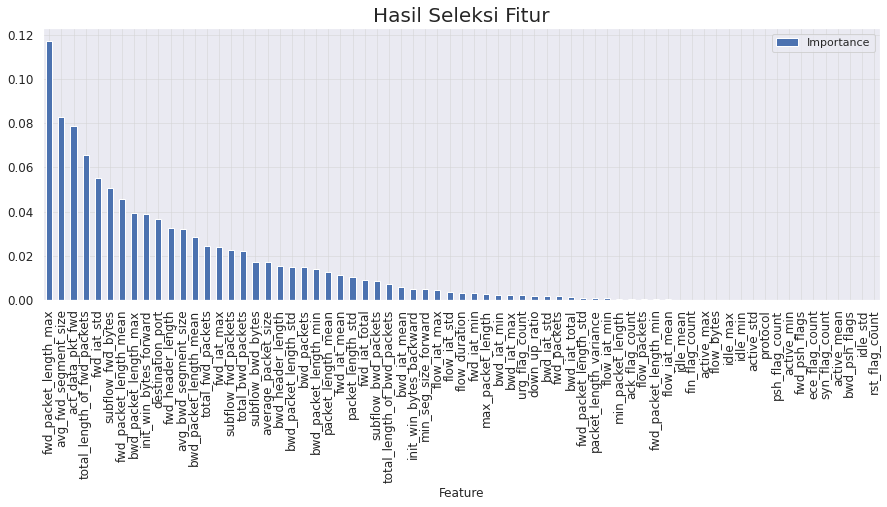

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

rfc.fit(X_ros, y_ros);

score = np.round(rfc.feature_importances_, 5)
importances = pd.DataFrame({'Feature': traincols, 'Importance': score})
importances = importances.sort_values('Importance', ascending = False).set_index('Feature')

fsplot = importances.plot(kind = 'bar', figsize = (15,5))
fsplot.set_title('Hasil Seleksi Fitur', fontsize = 20)
fsplot.grid(color = 'lightgray', alpha = 0.5)

In [28]:
fs_score = "\n".join("{} = {}".format(x, y) for x, y in sorted(zip(score,traincols)))
print(fs_score)

0.0 = active_mean
0.0 = bwd_psh_flags
0.0 = ece_flag_count
0.0 = idle_std
0.0 = rst_flag_count
0.0 = syn_flag_count
1e-05 = active_min
1e-05 = fwd_psh_flags
1e-05 = psh_flag_count
2e-05 = protocol
4e-05 = active_std
5e-05 = idle_min
7e-05 = idle_max
8e-05 = flow_bytes
9e-05 = active_max
9e-05 = fin_flag_count
0.00018 = idle_mean
0.00031 = flow_iat_mean
0.00033 = fwd_packet_length_min
0.00036 = flow_packets
0.00041 = ack_flag_count
0.00063 = min_packet_length
0.0008 = flow_iat_min
0.00097 = packet_length_variance
0.00104 = fwd_packet_length_std
0.0011 = bwd_iat_total
0.0017 = fwd_packets
0.00186 = bwd_iat_std
0.00192 = down_up_ratio
0.00201 = urg_flag_count
0.00207 = bwd_iat_max
0.00226 = bwd_iat_min
0.00278 = max_packet_length
0.00299 = flow_duration
0.00299 = fwd_iat_min
0.00339 = flow_iat_std
0.0044 = flow_iat_max
0.00503 = min_seg_size_forward
0.00516 = init_win_bytes_backward
0.00607 = bwd_iat_mean
0.00718 = total_length_of_bwd_packets
0.00834 = subflow_bwd_packets
0.00887 = fwd_ia

In [29]:
from sklearn.feature_selection import SelectFromModel
import itertools

sfm = SelectFromModel(rfc, threshold = 'mean')
sfm = sfm.fit(X_ros, y_ros)

feature_map = [(i, j) for i, j in itertools.zip_longest(sfm.get_support(), traincols)]
selected_features = [j for i, j in feature_map if i == True] 

In [30]:
selected_features

['total_fwd_packets',
 'total_length_of_fwd_packets',
 'total_length_of_bwd_packets',
 'fwd_packet_length_max',
 'fwd_packet_length_mean',
 'bwd_packet_length_max',
 'bwd_packet_length_min',
 'bwd_packet_length_mean',
 'bwd_packet_length_std',
 'fwd_iat_mean',
 'fwd_iat_std',
 'fwd_iat_max',
 'fwd_header_length',
 'average_packet_size',
 'avg_fwd_segment_size',
 'avg_bwd_segment_size',
 'subflow_fwd_packets',
 'subflow_fwd_bytes',
 'subflow_bwd_packets',
 'subflow_bwd_bytes',
 'init_win_bytes_forward',
 'act_data_pkt_fwd']

Partisi Data

In [31]:
fullcols = list(traincols)
fullcols.append('label')

X_ros_df = pd.DataFrame(X_ros)
y_ros_df = pd.DataFrame(y_ros)

traindf = pd.concat([X_ros_df, y_ros_df], axis = 1)
traindf.columns = fullcols

testdf = pd.concat([sc_dftest, en_ytest], axis = 1)
testdf.columns = fullcols

print(traindf.shape)
print(testdf.shape)

(256054, 70)
(7760, 70)


In [32]:
X_train = traindf[traincols].values
X_test = testdf[traincols].values

X_train_fs = traindf[selected_features].values
X_test_fs = testdf[selected_features].values

ytrain = traindf[['label']].copy()
#y_train = ytrain.values
r, c = ytrain.values.shape
y_train = ytrain.values.reshape(r,)
y_train = y_train.astype(np.int64)

ytest = testdf[['label']].copy()
#y_test = ytest.values
r, c = ytest.values.shape
y_test = ytest.values.reshape(r,)
y_test = y_test.astype(np.int64)

In [33]:
X_train.shape

(256054, 69)

In [34]:
X_train_fs.shape

(256054, 22)

In [35]:
X_test.shape

(7760, 69)

In [36]:
X_test_fs.shape

(7760, 22)

In [37]:
y_train.shape

(256054,)

In [38]:
y_test.shape

(7760,)

Pelatihan dan Pengujian dengan Fitur Terpilih

In [39]:
class grnn2(object):
    def __init__(self):
        self.L2 = []
        print('Empty GRNN created.')
    
    def rbf(self, centre, x, sigma):
        #centre = centre.reshape(1,-1)
        temp = -np.sum((centre - x) ** 2, axis = 1)
        temp = temp / (2 * (sigma ** 2))
        temp = np.exp(temp)
        gaussian = np.sum(temp)
        return gaussian

    def train(self, X, y, p):
        self.num_train = X.shape[0]
        #self.num_feature = X.shape[1]
        self.num_class = p
        #labels = np.unique(y)
        #num_class = len(labels)
        for i in range(self.num_class):
            #self.L2.append([])
            indices = np.where(y == i)
            self.L2.append(X[indices,:])
        #for j in range(self.num_train):
            #self.L2[y[j]].append(X[j])
        self.L2 = np.array(self.L2)
        print('GRNN with %d classes trained.' % self.num_class)
    
    def predict(self, X, sigma):
        self.num_test = X.shape[0]
        self.L3 = np.zeros(self.num_class)
        self.L4 = np.zeros(self.num_test)
        self.sig = sigma
        for i in range(self.num_test):
            for j in range(self.num_class):
                self.L3[j] = np.sum(self.rbf(X[i], self.L2[j][0], self.sig)) / self.L2[j][0].shape[0]
                #for ji in range(len(self.L2[j])):
                    #self.L3[j] += self.rbf(X[i], self.L2[j][ji], self.sig)
                #self.L3[j] /= len(self.L2[j])
            self.L4[i] = np.argmax(self.L3)
        return self.L4
                         
    def crossValidate(self, X, y, sigma):
        result = self.predict(X, sigma)
        num_correct = sum(result == y)
        print('Cross validation accuracy with sigma %.2f: %.1f%%' % (sigma, num_correct/len(y) * 100))

In [40]:
grnn2 = grnn2()

Empty GRNN created.


In [41]:
grnn2.train(X_train_fs, y_train, p=2)

GRNN with 2 classes trained.


In [42]:
s2 = 0
sigma2 = []
accuracy2 = []

while s2 <= 1.5:
    s2 += 0.1
    result2 = grnn2.predict(X_test_fs, s2)
    num_correct2 = sum(result2 == y_test)
    score2 = num_correct2 / len(y_test) * 100
    sigma2.append(s2)
    accuracy2.append(score2)
    print('Cross Validation accuracy with sigma %.2f: %.1f%%' % (s2, score2))
#print("The best sigma: ", max(sigma)," with accuracy: ", max(accuracy))

Cross Validation accuracy with sigma 0.10: 35.6%
Cross Validation accuracy with sigma 0.20: 35.6%
Cross Validation accuracy with sigma 0.30: 35.6%
Cross Validation accuracy with sigma 0.40: 35.6%
Cross Validation accuracy with sigma 0.50: 36.1%
Cross Validation accuracy with sigma 0.60: 43.4%
Cross Validation accuracy with sigma 0.70: 63.0%
Cross Validation accuracy with sigma 0.80: 77.4%
Cross Validation accuracy with sigma 0.90: 81.6%
Cross Validation accuracy with sigma 1.00: 81.5%
Cross Validation accuracy with sigma 1.10: 80.2%
Cross Validation accuracy with sigma 1.20: 76.4%
Cross Validation accuracy with sigma 1.30: 74.5%
Cross Validation accuracy with sigma 1.40: 71.5%
Cross Validation accuracy with sigma 1.50: 69.4%


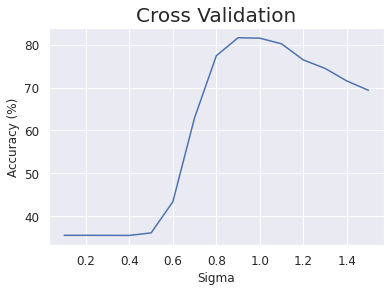

In [43]:
plt.title('Cross Validation', fontsize = 20)
plt.plot(sigma2,accuracy2)
plt.xlabel('Sigma')
plt.ylabel('Accuracy (%)')
plt.grid(linestyle = '-', linewidth = 1)
plt.rcParams["figure.figsize"] = [8,5]
plt.show()

In [44]:
predictions2 = grnn2.predict(X_test_fs, sigma=1)
print(predictions2)

[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1.

In [45]:
import sklearn.metrics as metrics

accuracy2 = metrics.accuracy_score(y_test, predictions2)
confusion_matrix2 = metrics.confusion_matrix(y_test, predictions2)
classification2 = metrics.classification_report(y_test, predictions2)
print()
print('========================= GRNN Model Test Result =========================')
print()
print ("Model Accuracy:" "\n", accuracy2)
print()
print("Confusion matrix:" "\n", confusion_matrix2)
print()
print("Classification report:" "\n", classification2) 
print()


========================= GRNN Model Test Result =========================

Model Accuracy:
 0.8150773195876289

Confusion matrix:
 [[2712   49]
 [1386 3613]]

Classification report:
               precision    recall  f1-score   support

           0       0.66      0.98      0.79      2761
           1       0.99      0.72      0.83      4999

    accuracy                           0.82      7760
   macro avg       0.82      0.85      0.81      7760
weighted avg       0.87      0.82      0.82      7760




In [46]:
print ("Precision:" "\n", metrics.precision_score(y_test, predictions2, average = 'macro'))
print()
print("Recall:" "\n", metrics.recall_score(y_test, predictions2, average = 'macro'))
print()
print("F1-Score:" "\n", metrics.f1_score(y_test, predictions2, average = 'macro')) 

Precision:
 0.8242027854431528

Recall:
 0.852498677931892

F1-Score:
 0.8125502865469413
